In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score

In [3]:
df = pd.read_csv('data_prepared.csv')

In [6]:
df.head()

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,Life Sciences,2,3,2,Sales Executive,4,Single,5993,Yes,0,8,6,4,5
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,2,2,Research Scientist,2,Married,5130,No,1,10,10,7,7
2,37,1,Travel_Rarely,Research & Development,Other,4,2,1,Laboratory Technician,3,Single,2090,Yes,0,7,0,0,0
3,33,0,Travel_Frequently,Research & Development,Life Sciences,4,3,1,Research Scientist,3,Married,2909,Yes,0,8,8,7,0
4,27,0,Travel_Rarely,Research & Development,Medical,1,3,1,Laboratory Technician,2,Married,3468,No,1,6,2,2,2


In [23]:
categorical = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical.remove("Attrition")

In [24]:
numerical

['Age',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'StockOptionLevel',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager']

In [25]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [26]:
len(df_train), len(df_val), len(df_test)

(882, 294, 294)

In [27]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.Attrition.values
y_val = df_val.Attrition.values
y_test = df_test.Attrition.values

del df_train['Attrition']
del df_val['Attrition']
del df_test['Attrition']

In [28]:
dv = DictVectorizer(sparse=False)

In [29]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [33]:
model = LogisticRegression(solver='lbfgs', C=1.0, max_iter=100000)

In [34]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100000
,multi_class,'deprecated'


In [35]:
y_pred = model.predict_proba(X_val)[:, 1]

In [37]:
round(roc_auc_score(y_val, y_pred), 2)

0.81

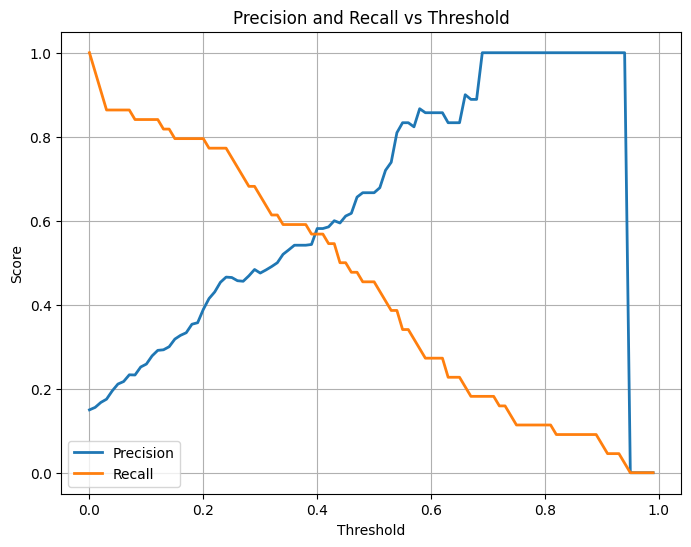

In [40]:
thresholds = np.arange(0.0, 1, 0.01)
precisions = []
recalls = []

for t in thresholds:
    y_pred_bin = (y_pred >= t).astype(int)
    precisions.append(precision_score(y_val, y_pred_bin, zero_division=0))
    recalls.append(recall_score(y_val, y_pred_bin))

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions, label='Precision', linewidth=2)
plt.plot(thresholds, recalls, label='Recall', linewidth=2)
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()